<h1>Loading the Data</h1>
<h2>Importing Libraries and Packages</h2>

In [11]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math



In [12]:
pd.set_option("display.max_columns", 100)
%matplotlib inline

In [13]:
DATA_PATH = Path.cwd() / ""

In [14]:
train_df = pd.read_csv(DATA_PATH / "train.csv", index_col="tripid")
print("train_df.shape", train_df.shape)

train_df.shape (17176, 13)


In [15]:
train_df.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
tripid,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17176 entries, 189123628 to 213817296
Data columns (total 13 columns):
additional_fare              16974 non-null float64
duration                     16974 non-null float64
meter_waiting                16974 non-null float64
meter_waiting_fare           16974 non-null float64
meter_waiting_till_pickup    16974 non-null float64
pickup_time                  17176 non-null object
drop_time                    17176 non-null object
pick_lat                     17176 non-null float64
pick_lon                     17176 non-null float64
drop_lat                     17176 non-null float64
drop_lon                     17176 non-null float64
fare                         17039 non-null float64
label                        17176 non-null object
dtypes: float64(10), object(3)
memory usage: 1.8+ MB


<h2>Observations</h2>

<h3>train_df</h3>
<p>
12 feature columns in which 10 are numeric and 2 are categorical.

The categorical data are date and time objects.

The dataset contains 17176 records.<p>


<h2>Check for Missing Values</h2>

In [17]:
train_df.isna().sum()

additional_fare              202
duration                     202
meter_waiting                202
meter_waiting_fare           202
meter_waiting_till_pickup    202
pickup_time                    0
drop_time                      0
pick_lat                       0
pick_lon                       0
drop_lat                       0
drop_lon                       0
fare                         137
label                          0
dtype: int64

In [18]:
train_df.isna().head()


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
tripid,,,,,,,,,,,,,
189123628,False,False,False,False,False,False,False,False,False,False,False,False,False
189125358,False,False,False,False,False,False,False,False,False,False,False,False,False
189125719,False,False,False,False,False,False,False,False,False,False,False,False,False
189127273,False,False,False,False,False,False,False,False,False,False,False,False,False
189128020,True,True,True,True,True,False,False,False,False,False,False,False,False


<h1>Exploring the Data</h1>
<h2>Labels</h2>
<h3>Checking Class Balancing</h3>

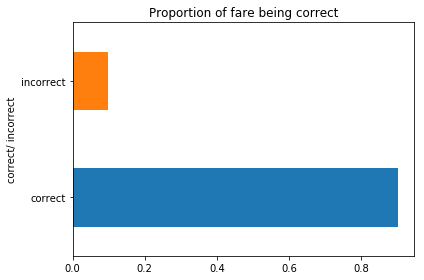

In [19]:
fig, ax = plt.subplots()
n_obs = train_df.shape[0]

(train_df['label']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of fare being correct", ax=ax)
)
ax.set_ylabel("correct/ incorrect")


fig.tight_layout()


<h3>Target Variable Dependency</h3>

In [20]:
pd.crosstab(train_df['label'], train_df['label'], margins=True, normalize=True)


label,correct,incorrect,All
label,,,
correct,0.902131,0.000000,0.902131
incorrect,0.000000,0.097869,0.097869
All,0.902131,0.097869,1.000000


In [21]:
len(train_df[(train_df['label']=='correct')])

15495

In [22]:
len(train_df[(train_df['label']=='incorrect')])

1681

<h3>Observations</h3>

Incorrect/ Correct classes are not balanced. The number of "Incorrect" labels are significantly low. (1681/ 15495)

<h2>Correlation of Features with the Labels</h2>

<h3>additional_fare  with label</h3>

In [23]:
counts = (train_df[['additional_fare', 'label']]
              .groupby(['additional_fare', 'label'])
              .size()
              .unstack('label')
         )

counts

label,correct,incorrect
additional_fare,,
0.00,1.0,13.0
5.00,1203.0,8.0
10.00,1.0,NaN
10.50,13199.0,1309.0
11.00,20.0,1.0
20.50,12.0,2.0
21.00,94.0,8.0
25.00,11.0,NaN
30.50,245.0,23.0


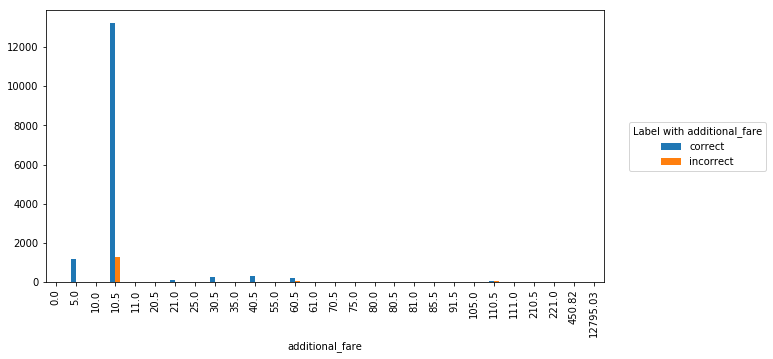

In [24]:
ax = counts.plot.bar(figsize=(10,5))
#ax.invert_yaxis()
ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), title='Label with additional_fare')


In [25]:
additional_fare_counts = counts.sum(axis='columns')
additional_fare_counts

additional_fare
0.00           14.0
5.00         1211.0
10.00           1.0
10.50       14508.0
11.00          21.0
20.50          14.0
21.00         102.0
25.00          11.0
30.50         268.0
35.00          14.0
40.50         336.0
55.00          21.0
60.50         271.0
61.00           1.0
70.50           1.0
75.00           3.0
80.00           2.0
80.50          38.0
81.00           4.0
85.50          11.0
91.50           1.0
105.00          5.0
110.50        109.0
111.00          1.0
210.50          2.0
221.00          2.0
450.82          1.0
12795.03        1.0
dtype: float64

In [26]:
props = counts.div(additional_fare_counts, axis='index')
props

label,correct,incorrect
additional_fare,,
0.00,0.071429,0.928571
5.00,0.993394,0.006606
10.00,1.000000,NaN
10.50,0.909774,0.090226
11.00,0.952381,0.047619
20.50,0.857143,0.142857
21.00,0.921569,0.078431
25.00,1.000000,NaN
30.50,0.914179,0.085821


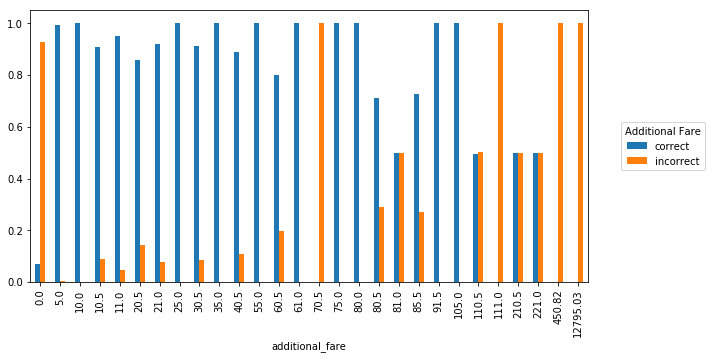

In [27]:
ax = props.plot.bar(figsize=(10,5))
#ax.invert_yaxis()

ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title='Additional Fare')


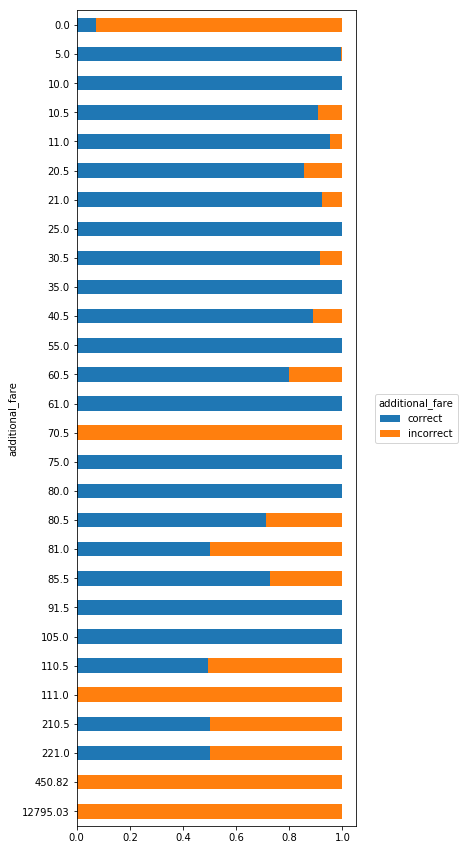

In [28]:
## stacked bar chart

ax = props.plot.barh(stacked=True, figsize=(5,15))
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title='additional_fare')


<h3>Observations</h3>

Since the class imbalance it's hard to get a conclusion.
Might have to analyze breaking values into classes the it will be a useful feature.

<h3>Time of the day (Hourly) with label</h3>

In [36]:
train_df['Hour'] = pd.to_datetime(train_df['drop_time'])

train_df['Hour'] = train_df['Hour'].apply(lambda x: x.hour+1)
train_df

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,checkout_datetime,Hour
tripid,,,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.000000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct,2019-11-01 00:34:00,1
189125358,10.5,791.0,47.0,0.000000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct,2019-11-01 01:09:00,2
189125719,10.5,1087.0,80.0,0.000000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct,2019-11-01 01:26:00,2
189127273,10.5,598.0,271.0,15.663800,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct,2019-11-01 02:37:00,3
189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct,2019-11-01 03:51:00,4
189129552,10.5,3407.0,182.0,0.000000,112.0,11/1/2019 5:38,11/1/2019 6:35,7.13402,79.8969,6.91865,79.8649,1065.02,correct,2019-11-01 06:35:00,7
189132829,10.5,1246.0,487.0,0.000000,133.0,11/1/2019 6:29,11/1/2019 6:49,6.84371,79.9051,6.85069,79.8624,266.62,correct,2019-11-01 06:49:00,7
189135103,10.5,1333.0,295.0,17.198500,212.0,11/1/2019 6:50,11/1/2019 7:12,6.90760,79.9524,6.90634,79.9042,318.05,correct,2019-11-01 07:12:00,8
189139296,10.5,360.0,80.0,4.664000,3.0,11/1/2019 7:00,11/1/2019 7:06,7.26706,80.6064,7.27422,80.6124,100.32,correct,2019-11-01 07:06:00,8


In [37]:
counts = (train_df[['Hour', 'label']]
              .groupby(['Hour', 'label'])
              .size()
              .unstack('label')
         )

counts

label,correct,incorrect
Hour,,
1,188,24
2,93,9
3,75,7
4,43,7
5,42,6
6,72,12
7,199,26
8,453,48
9,800,69


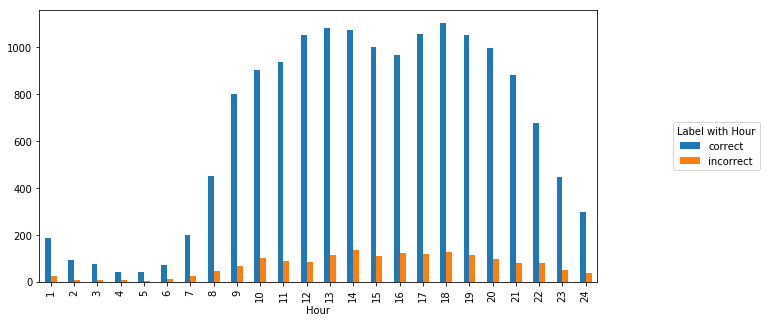

In [38]:
ax = counts.plot.bar(figsize=(10,5))
#ax.invert_yaxis()
ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), title='Label with Hour')


In [39]:
Hourly_counts = counts.sum(axis='columns')
props = counts.div(Hourly_counts, axis='index')
props

label,correct,incorrect
Hour,,
1,0.886792,0.113208
2,0.911765,0.088235
3,0.914634,0.085366
4,0.860000,0.140000
5,0.875000,0.125000
6,0.857143,0.142857
7,0.884444,0.115556
8,0.904192,0.095808
9,0.920598,0.079402


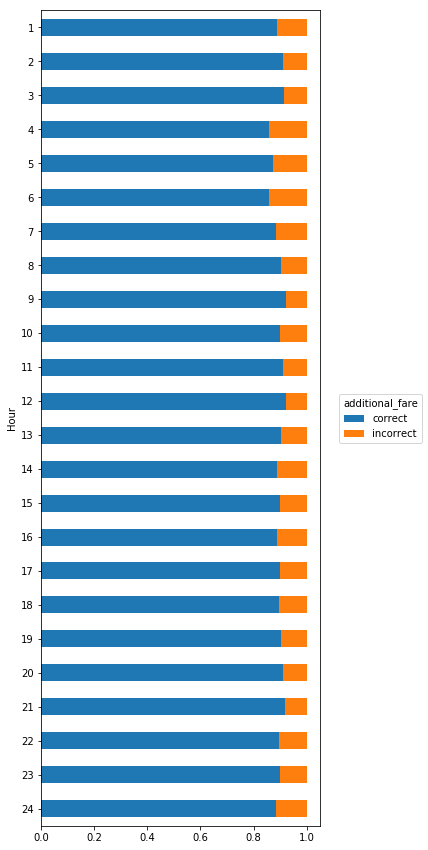

In [40]:
## stacked bar chart

ax = props.plot.barh(stacked=True, figsize=(5,15))
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title='additional_fare')


In [41]:
train_df['checkout_datetime'] = pd.to_datetime(train_df['drop_time'])
train_df['checkin_datetime'] = pd.to_datetime(train_df['pickup_time'])
#train_df['duration'] = train_df['checkout_datetime']-train_df['checkin_datetime']
train_df['duration_in_minutes'] = (train_df['checkout_datetime']-train_df['checkin_datetime'])/pd.Timedelta(minutes=1)
train_df

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,checkout_datetime,Hour,checkin_datetime,duration_in_minutes
tripid,,,,,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.000000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct,2019-11-01 00:34:00,1,2019-11-01 00:20:00,14.0
189125358,10.5,791.0,47.0,0.000000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct,2019-11-01 01:09:00,2,2019-11-01 00:56:00,13.0
189125719,10.5,1087.0,80.0,0.000000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct,2019-11-01 01:26:00,2,2019-11-01 01:08:00,18.0
189127273,10.5,598.0,271.0,15.663800,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct,2019-11-01 02:37:00,3,2019-11-01 02:27:00,10.0
189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct,2019-11-01 03:51:00,4,2019-11-01 03:34:00,17.0
189129552,10.5,3407.0,182.0,0.000000,112.0,11/1/2019 5:38,11/1/2019 6:35,7.13402,79.8969,6.91865,79.8649,1065.02,correct,2019-11-01 06:35:00,7,2019-11-01 05:38:00,57.0
189132829,10.5,1246.0,487.0,0.000000,133.0,11/1/2019 6:29,11/1/2019 6:49,6.84371,79.9051,6.85069,79.8624,266.62,correct,2019-11-01 06:49:00,7,2019-11-01 06:29:00,20.0
189135103,10.5,1333.0,295.0,17.198500,212.0,11/1/2019 6:50,11/1/2019 7:12,6.90760,79.9524,6.90634,79.9042,318.05,correct,2019-11-01 07:12:00,8,2019-11-01 06:50:00,22.0
189139296,10.5,360.0,80.0,4.664000,3.0,11/1/2019 7:00,11/1/2019 7:06,7.26706,80.6064,7.27422,80.6124,100.32,correct,2019-11-01 07:06:00,8,2019-11-01 07:00:00,6.0


In [42]:
counts = (train_df[['drop_lat', 'label']]
              .groupby(['drop_lat', 'label'])
              .size()
              .unstack('label')
         )

counts

label,correct,incorrect
drop_lat,,
5.94186,1.0,NaN
5.94313,1.0,NaN
5.94332,1.0,NaN
5.94537,1.0,NaN
5.94684,1.0,NaN
5.95099,1.0,NaN
5.95203,1.0,NaN
5.95853,1.0,NaN
5.96164,1.0,NaN


In [43]:
math.sqrt(7.33**2+5.22**2)

8.998738800520881

[189123628 189125358 189125719 ... 213813930 213815405 213817296]


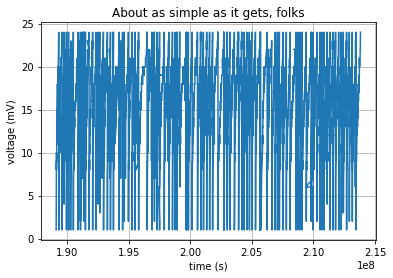

In [45]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = train_df.index.values
print(t)
s = train_df['Hour']

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

In [51]:
train_df['day'] = pd.to_datetime(train_df['drop_time'])

train_df['weekday'] = train_df['day'].apply(lambda x: x.weekday())

train_df


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,checkout_datetime,Hour,checkin_datetime,duration_in_minutes,day,weekday
tripid,,,,,,,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.000000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct,2019-11-01 00:34:00,1,2019-11-01 00:20:00,14.0,2019-11-01 00:34:00,4
189125358,10.5,791.0,47.0,0.000000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct,2019-11-01 01:09:00,2,2019-11-01 00:56:00,13.0,2019-11-01 01:09:00,4
189125719,10.5,1087.0,80.0,0.000000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct,2019-11-01 01:26:00,2,2019-11-01 01:08:00,18.0,2019-11-01 01:26:00,4
189127273,10.5,598.0,271.0,15.663800,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct,2019-11-01 02:37:00,3,2019-11-01 02:27:00,10.0,2019-11-01 02:37:00,4
189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct,2019-11-01 03:51:00,4,2019-11-01 03:34:00,17.0,2019-11-01 03:51:00,4
189129552,10.5,3407.0,182.0,0.000000,112.0,11/1/2019 5:38,11/1/2019 6:35,7.13402,79.8969,6.91865,79.8649,1065.02,correct,2019-11-01 06:35:00,7,2019-11-01 05:38:00,57.0,2019-11-01 06:35:00,4
189132829,10.5,1246.0,487.0,0.000000,133.0,11/1/2019 6:29,11/1/2019 6:49,6.84371,79.9051,6.85069,79.8624,266.62,correct,2019-11-01 06:49:00,7,2019-11-01 06:29:00,20.0,2019-11-01 06:49:00,4
189135103,10.5,1333.0,295.0,17.198500,212.0,11/1/2019 6:50,11/1/2019 7:12,6.90760,79.9524,6.90634,79.9042,318.05,correct,2019-11-01 07:12:00,8,2019-11-01 06:50:00,22.0,2019-11-01 07:12:00,4
189139296,10.5,360.0,80.0,4.664000,3.0,11/1/2019 7:00,11/1/2019 7:06,7.26706,80.6064,7.27422,80.6124,100.32,correct,2019-11-01 07:06:00,8,2019-11-01 07:00:00,6.0,2019-11-01 07:06:00,4
